# Molecular Interaction: Minimal network for lineage commitment


Early studies reported that basophils are derived from GMPs (Iwasaki et al., 2006; Truong and Ben-David, 2000). Our HSC dataset, however, suggests that they mostly originated from MEP-like cells (with a minor route from GMP-like cells), in line with recent scRNA-seq studies (Drissen et al., 2016; Pellin et al., 2019). To reconcile the discrepancy of two alternative trajectories of the Bas lineage, we derive a minimal network model of its commitment. 

In this tutorial, we will reveal a regulatory network governing the Bas lineage's dual origins.

Import relevant packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.dtype size changed")

import dynamo as dyn

dyn.configuration.set_figure_params('dynamo', background='white')
dyn.pl.style(font_path='Arial')
dyn.get_all_dependencies_version()

%load_ext autoreload
%autoreload 2

Using already downloaded Arial font from: /tmp/dynamo_arial.ttf
Registered custom font as: Arial


 ███                               ████████        
█████   █████    █████    █████    ███   █████      
   ██████   ██████   ██████   ████████      ████ 
  ___                           ████            ███
 |   \ _  _ _ _  __ _ _ __  ___                 ███
 | |) | || | ' \/ _` | '  \/ _ \█████           ███ 
 |___/ \_, |_||_\__,_|_|_|_\___/█████       ████  
       |__/                        ███   █████     
Tutorial: https://dynamo-release.readthedocs.io/       
                                     █████      



package,umap-learn,typing-extensions,tqdm,statsmodels,setuptools,session-info,seaborn,scipy,requests,pynndescent,pre-commit,pandas,openpyxl,numdifftools,numba,networkx,mudata,matplotlib,loompy,leidenalg,igraph,dynamo-release,colorcet,anndata
version,0.5.7,4.13.2,4.67.1,0.14.4,79.0.0,1.0.1,0.13.2,1.11.4,2.32.3,0.5.13,4.2.0,2.2.3,3.1.5,0.9.41,0.60.0,3.4.2,0.3.1,3.10.3,3.0.8,0.10.2,0.11.8,1.4.2rc1,3.1.0,0.11.4


In [2]:
adata_labeling = dyn.sample_data.hematopoiesis()

|-----> Downloading processed hematopoiesis adata
|-----> Downloading data to ./data/hematopoiesis.h5ad
|-----> File ./data/hematopoiesis.h5ad already exists.


## Regulatory network governing the Bas lineage’s dual origins

Switch pair ranking analyses prioritized the involvement of CEBPA and RUNX1, previously reported in (Guo et al., 2017), as well as GATA1, the master regulator of the GMP lineage. Subsequent Jacobian analyses indicate repression of RUNX1 and GATA2 by CEBPA, as well as mutual activation between RUNX1 and GATA2 and their self-activation in progenitors.

In this section, we will show

- GATA2 has high expression in the Bas lineage
- CEBPA represses RUNX1 and GATA2
- A minimal network governing GMP vs. Bas origin of Bas lineage

GATA2 has high expression in the Bas lineage

|-----------> plotting with basis key=X_umap
|-----------> plotting with basis key=X_umap
|-----------> skip filtering cell_type by stack threshold when stacking color because it is not a numeric type


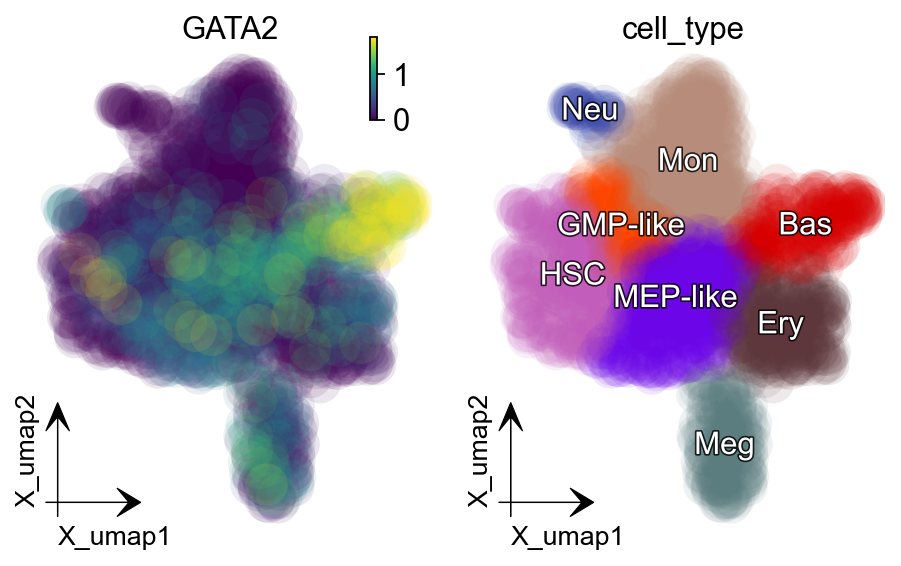

In [3]:
dyn.pl.scatters(adata_labeling, 
                color=["GATA2", "cell_type"],
               figsize=(4,4),dpi=80)


Next, we will calculate jacobian via `dyn.vf.jacobian`. It shows that CEBPA represses RUNX1 and GATA2.

Transforming subset Jacobian: 100%|██████████| 1947/1947 [00:00<00:00, 82128.77it/s]


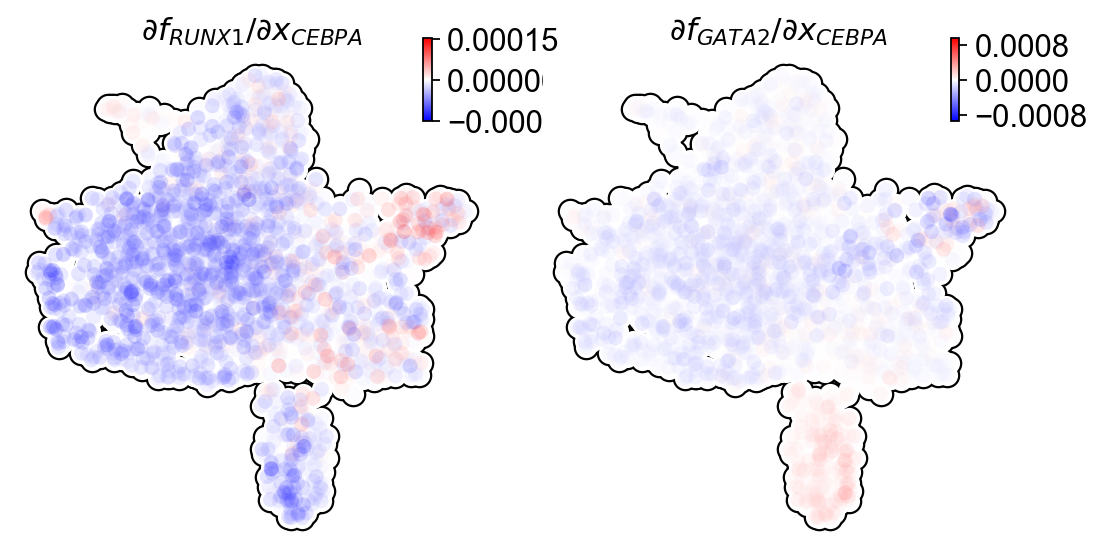

In [5]:
selected_genes = ["GATA2", "CEBPA", "RUNX1"]

dyn.vf.jacobian(adata_labeling, regulators=selected_genes, effectors=selected_genes)
dyn.pl.jacobian(
    adata_labeling,
    regulators="CEBPA",
    effectors=["RUNX1", "GATA2"],
    basis="umap",
    figsize=(4,4)
)



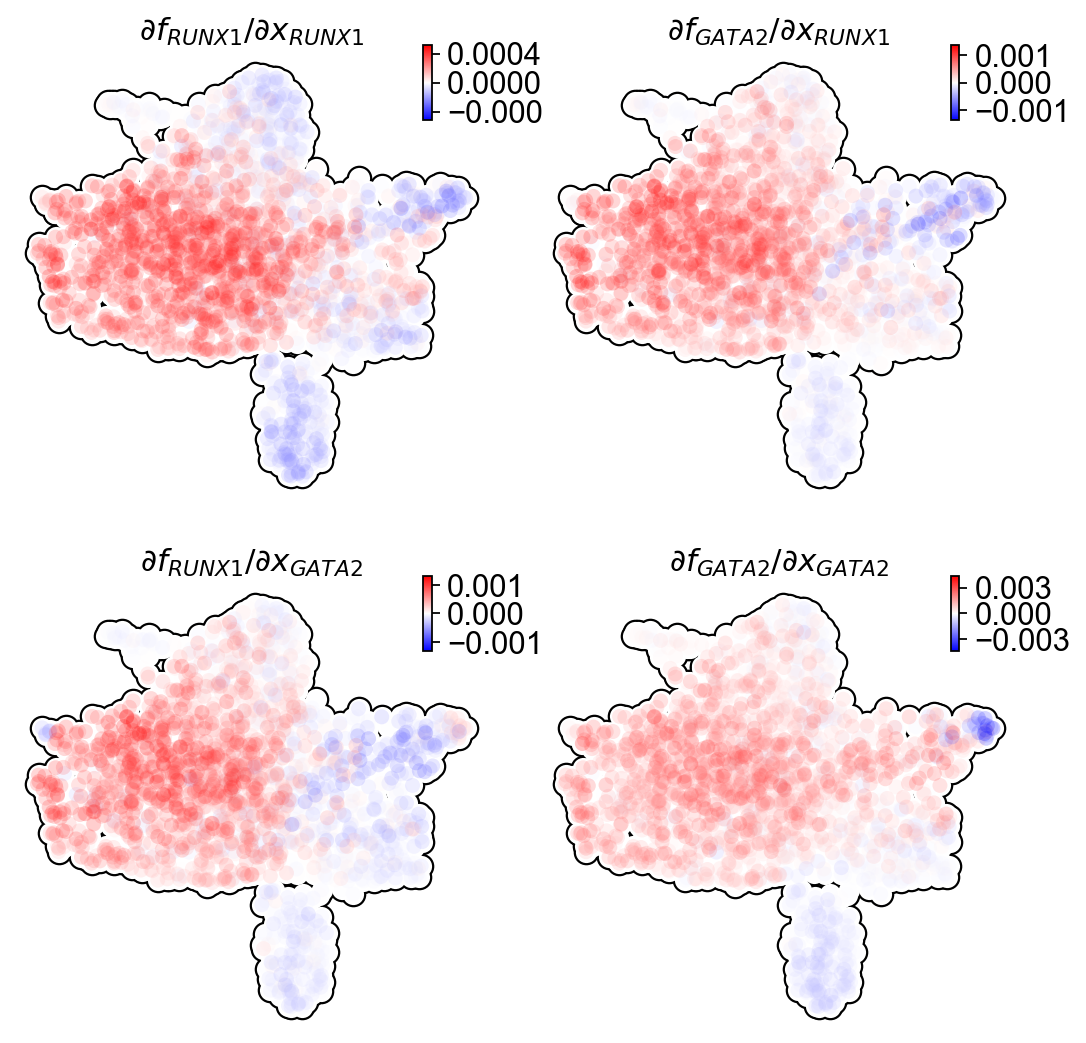

In [6]:
dyn.pl.jacobian(
    adata_labeling,
    effectors=["RUNX1", "GATA2"],
    basis="umap",
    figsize=(4,4)
)


Jacobian analyses confirm the known repression from GATA1 to GATA2, activation from GATA2 back to GATA1,

Transforming subset Jacobian: 100%|██████████| 1947/1947 [00:00<00:00, 62699.60it/s]


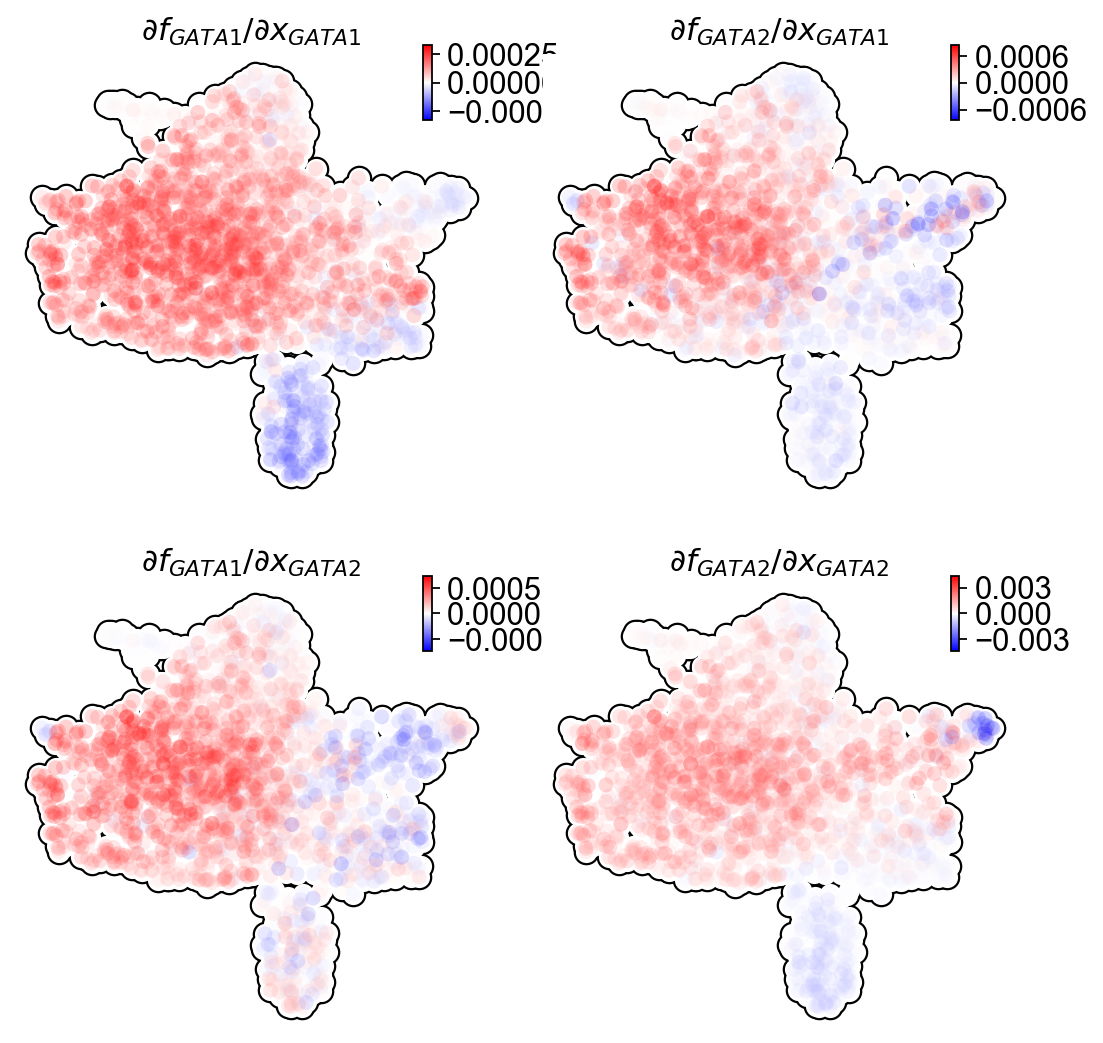

In [7]:
dyn.vf.jacobian(
    adata_labeling,
    effectors=["GATA1", "GATA2"],
)

dyn.pl.jacobian(
    adata_labeling,
    effectors=["GATA1", "GATA2"],
    basis="umap",
    figsize=(4,4)
)


### A minimal network governing GMP vs. Bas origin of Bas lineage
For the network of KLF1 and FLI1 (MEP on the right in the schematic below), please refer to dynamo paper or our tutorial *Molecular mechnism of earliest and fastest appearance of megakaryocytes*.  
Collectively,  analyses above reveal a network comprises the repression from key regulators of both GMP lineage and MEP lineage (CEBPA and GATA1 respectively) to the basophil master regulators GATA2 and RUNX1, suggesting that Bas lineage can arise via two potential trajectories, from either GMP or MEP cells, consistent with (Drissen et al., 2019).

![fig5_g_iv](images/fig5_g_iv.png)